In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Load datasets

In [2]:
region_data = pd.read_csv('./salaries-by-region.csv')
college_type_data = pd.read_csv('./salaries-by-college-type.csv')

#### Display the first few rows of each dataset

In [3]:
region_data.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [4]:
college_type_data.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


### Data Cleaning

#### Checking for missing values

In [5]:
region_data.isnull().sum()

School Name                           0
Region                                0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    47
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    47
dtype: int64

In [6]:
college_type_data.isnull().sum()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
dtype: int64

#### Fill or drop missing values if necessary

In [7]:
region_data.dropna(inplace=True)
college_type_data.dropna(inplace=True)

#### Verify the conversion

In [8]:
region_data.dtypes

School Name                          object
Region                               object
Starting Median Salary               object
Mid-Career Median Salary             object
Mid-Career 10th Percentile Salary    object
Mid-Career 25th Percentile Salary    object
Mid-Career 75th Percentile Salary    object
Mid-Career 90th Percentile Salary    object
dtype: object

In [9]:
college_type_data.dtypes

School Name                          object
School Type                          object
Starting Median Salary               object
Mid-Career Median Salary             object
Mid-Career 10th Percentile Salary    object
Mid-Career 25th Percentile Salary    object
Mid-Career 75th Percentile Salary    object
Mid-Career 90th Percentile Salary    object
dtype: object

#### Convert salary columns to numeric values

In [10]:
region_data['Starting Median Salary'] = region_data['Starting Median Salary'].str.replace('[\$,]', '', regex=True).astype(float)
region_data['Mid-Career Median Salary'] = region_data['Mid-Career Median Salary'].str.replace('[\$,]', '', regex=True).astype(float)
college_type_data['Starting Median Salary'] = college_type_data['Starting Median Salary'].str.replace('[\$,]', '', regex=True).astype(float)
college_type_data['Mid-Career Median Salary'] = college_type_data['Mid-Career Median Salary'].str.replace('[\$,]', '', regex=True).astype(float)

#### Basic statistics

In [11]:
region_data.describe()

,Starting Median Salary,Mid-Career Median Salary
count,273.000000,273.000000
mean,46365.201465,83747.619048
std,6311.007952,14527.134974
min,34800.000000,46600.000000
25%,42200.000000,73500.000000
50%,45300.000000,82400.000000
75%,48900.000000,91600.000000
max,72200.000000,134000.000000


In [12]:
college_type_data.describe()

,Starting Median Salary,Mid-Career Median Salary
count,231.000000,231.000000
mean,45825.108225,82666.233766
std,6120.434189,14016.294341
min,34800.000000,43900.000000
25%,41950.000000,73050.000000
50%,44700.000000,81300.000000
75%,47650.000000,87850.000000
max,72200.000000,134000.000000


### EDA and Visualization

#### Salary Increase by Region

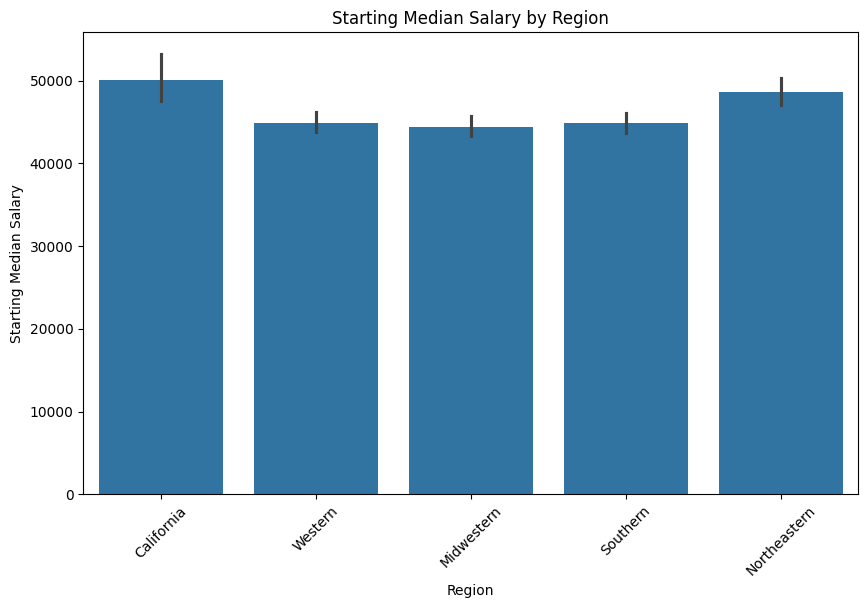

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Starting Median Salary', data=region_data)
plt.title('Starting Median Salary by Region')
plt.xticks(rotation=45)
plt.show()

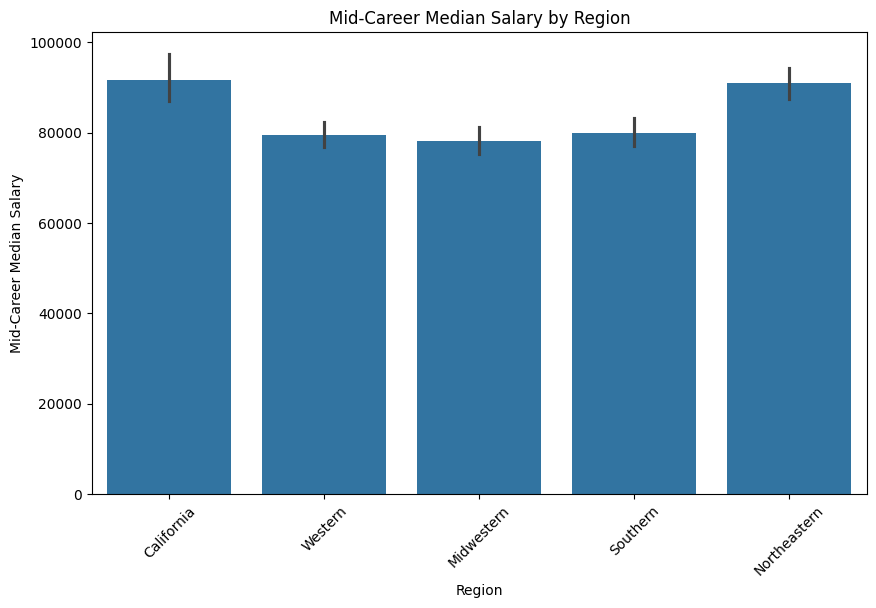

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mid-Career Median Salary', data=region_data)
plt.title('Mid-Career Median Salary by Region')
plt.xticks(rotation=45)
plt.show()

#### Salary Increase by College Type

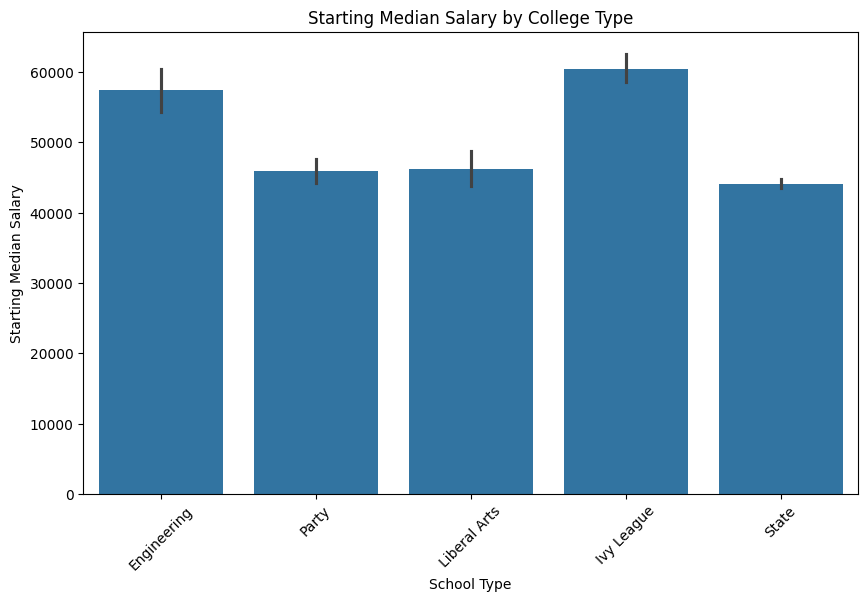

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='School Type', y='Starting Median Salary', data=college_type_data)
plt.title('Starting Median Salary by College Type')
plt.xticks(rotation=45)
plt.show()

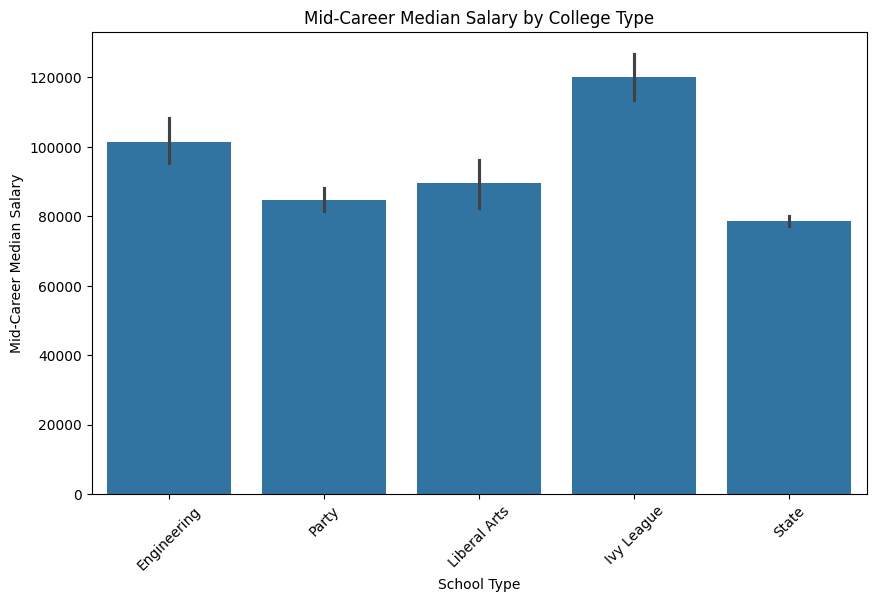

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='School Type', y='Mid-Career Median Salary', data=college_type_data)
plt.title('Mid-Career Median Salary by College Type')
plt.xticks(rotation=45)
plt.show()

#### Distribution of salary increase

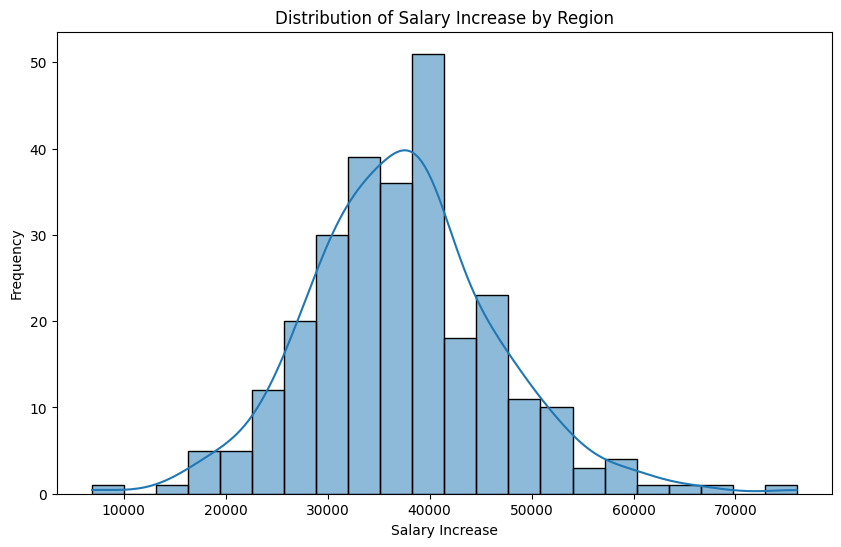

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(region_data['Mid-Career Median Salary'] - region_data['Starting Median Salary'], kde=True)
plt.title('Distribution of Salary Increase by Region')
plt.xlabel('Salary Increase')
plt.ylabel('Frequency')
plt.show()

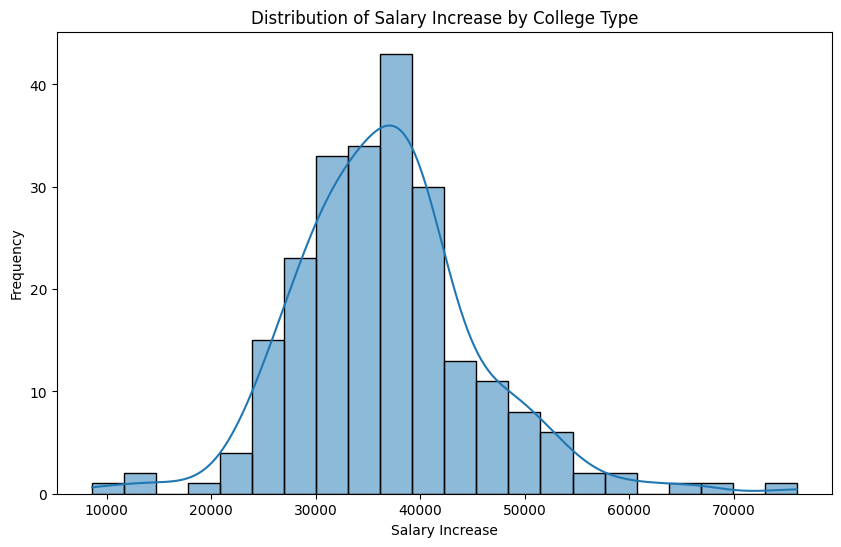

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(college_type_data['Mid-Career Median Salary'] - college_type_data['Starting Median Salary'], kde=True)
plt.title('Distribution of Salary Increase by College Type')
plt.xlabel('Salary Increase')
plt.ylabel('Frequency')
plt.show()

#### Combine datasets into a single DataFrame for modeling

In [19]:
combined_data = pd.merge(region_data, college_type_data, on='School Name', how='inner')

#### Drop columns with suffix '_y' and rename columns with suffix '_x' to remove suffix

In [20]:
columns_to_drop = [col for col in combined_data.columns if col.endswith('_y')]
combined_data.drop(columns=columns_to_drop, inplace=True)

# Rename columns with suffix '_x'
combined_data.columns = [col.replace('_x', '') for col in combined_data.columns]

In [21]:
combined_data.dropna(inplace=True)

In [22]:
combined_data.sample(10)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,School Type
104,Ball State University (BSU),Midwestern,39100.0,64500.0,"$35,500.00","$48,200.00","$89,300.00","$128,000.00",State
45,Lewis & Clark College,Western,38900.0,72600.0,"$38,200.00","$53,400.00","$104,000.00","$140,000.00",Liberal Arts
115,University of Richmond,Southern,48600.0,94600.0,"$44,500.00","$59,400.00","$151,000.00","$211,000.00",Liberal Arts
87,Ohio University,Midwestern,42200.0,73400.0,"$36,600.00","$52,800.00","$106,000.00","$150,000.00",State
47,"University of Nevada, Las Vegas (UNLV)",Western,45200.0,71600.0,"$39,000.00","$52,400.00","$100,000.00","$128,000.00",State
1,Cal Poly San Luis Obispo,California,57200.0,101000.0,"$55,000.00","$74,700.00","$133,000.00","$178,000.00",State
167,University of North Carolina at Wilmington (UNCW),Southern,37500.0,64400.0,"$32,100.00","$46,600.00","$97,100.00","$129,000.00",State
148,Florida International University (FIU),Southern,43200.0,75500.0,"$40,500.00","$55,800.00","$98,200.00","$136,000.00",State
67,University of Iowa (UI),Midwestern,44700.0,83900.0,"$43,300.00","$61,100.00","$116,000.00","$163,000.00",Party
90,University of Nebraska at Omaha,Midwestern,41500.0,72600.0,"$39,500.00","$54,400.00","$97,400.00","$126,000.00",State


#### Data Cleaning and Feature Engineering

In [23]:
label_encoder = LabelEncoder()
combined_data['Region'] = label_encoder.fit_transform(combined_data['Region'])
combined_data['School Type'] = label_encoder.fit_transform(combined_data['School Type'])
combined_data['School Name'] = label_encoder.fit_transform(combined_data['School Name'])

scaler = StandardScaler()
combined_data[['Starting Median Salary', 'Mid-Career Median Salary']] = scaler.fit_transform(combined_data[['Starting Median Salary', 'Mid-Career Median Salary']])

#### Selecting features and target variable

In [24]:
features = combined_data[['Region', 'School Type', 'School Name', 'Starting Median Salary']]
target = combined_data['Mid-Career Median Salary']

#### Splitting the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

#### Linear Regression Model

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### Deep Learning Model

In [27]:
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
deep_model.compile(optimizer='adam', loss='mse')
deep_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50


/home/bruisedwolf/tf-venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1716817064.815724   39475 service.cc:145] XLA service 0x7fd76c008780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716817064.815766   39475 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6


 1/18 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 240.9005

I0000 00:00:1716817065.427105   39475 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 76.5615 - val_loss: 4.6301
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4373 - val_loss: 1.7288
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5836 - val_loss: 1.0743
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1894 - val_loss: 0.9708
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7090 - val_loss: 0.8887
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9269 - val_loss: 0.8128
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5804 - val_loss: 0.7823
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5765 - val_loss: 0.7533
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7428 - val_loss: 0.5498
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4569 - val_loss: 0.4400
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4087 - val_loss: 0.3645
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2596 - val_loss: 0.643

#### Model Evaluation

In [28]:
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

deep_pred = deep_model.predict(X_test)
deep_mse = mean_squared_error(y_test, deep_pred)
deep_r2 = r2_score(y_test, deep_pred)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression R²: {linear_r2}")
print(f"Deep Learning Model MSE: {deep_mse}")
print(f"Deep Learning Model R²: {deep_r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step
Linear Regression MSE: 0.1124075541795869
Linear Regression R²: 0.8717181891190964
Deep Learning Model MSE: 0.2418829459146001
Deep Learning Model R²: 0.7239582112643506


#### Prediction Function

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Initialize label encoders and fit them with necessary data
regions_all = ['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
school_types_all = ['Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State']
schools_all = [
    'New Mexico Institute of Mining and Technology (New Mexico Tech)',
    'Missouri State University (MSU)',
    'University of Oregon',
    'University of Kentucky (UK)',
    'University of Minnesota',
    'Harvard University'
]

label_encoder = LabelEncoder()
label_encoder.fit(regions_all + school_types_all + schools_all)  # Fit with all possible labels

scaler = StandardScaler()
scaler.fit([[0]])  # Fit scaler with dummy data

def predict_best_school(schools, regions, school_types):
    n = len(schools)
    regions = (regions * (n // len(regions) + 1))[:n]
    school_types = (school_types * (n // len(school_types) + 1))[:n]
    
    input_data = pd.DataFrame({
        'Region': label_encoder.transform(regions),
        'School Type': label_encoder.transform(school_types),
        'School Name': label_encoder.transform(schools),
        'Starting Median Salary': scaler.transform([[0]] * len(schools)).flatten()  # Dummy data for starting salary
    })
    predictions = linear_model.predict(input_data)
    deep_predictions = deep_model.predict(input_data)

    results = pd.DataFrame({
        'School': schools,
        'Predicted Mid-Career Salary (Linear)': predictions,
        'Predicted Mid-Career Salary (Deep)': deep_predictions.flatten()
    })
    best_schools = results.sort_values(by='Predicted Mid-Career Salary (Deep)', ascending=False)
    return best_schools

# Example usage
schools = [
    'New Mexico Institute of Mining and Technology (New Mexico Tech)',
    'Missouri State University (MSU)',
    'University of Oregon',
    'University of Kentucky (UK)',
    'University of Minnesota',
    'Harvard University'
]

regions = ['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
school_types = ['Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State']

best_school_predictions = predict_best_school(schools, regions, school_types)

best_school_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


,School,Predicted Mid-Career Salary (Linear),Predicted Mid-Career Salary (Deep)
0,New Mexico Institute of Mining and Technology ...,0.020842,0.123862
5,Harvard University,0.018393,0.066329
3,University of Kentucky (UK),-0.107906,0.020348
4,University of Minnesota,-0.318853,-0.094823
2,University of Oregon,-0.097918,-0.258938
1,Missouri State University (MSU),-0.317917,-0.388274


In [46]:
# def predict_best_school(schools, regions, school_types, label_encoder, scaler):
#     n = len(schools)
#     regions = (regions * (n // len(regions) + 1))[:n]
#     school_types = (school_types * (n // len(school_types) + 1))[:n]

#     # Create a DataFrame with both 'Starting Median Salary' and 'Mid-Career Median Salary' columns
#     input_data = pd.DataFrame({
#         'Region': label_encoder.transform(regions),
#         'School Type': label_encoder.transform(school_types),
#         'School Name': label_encoder.transform(schools),
#         'Starting Median Salary': [0] * len(schools),  # Dummy data for starting salary
#         'Mid-Career Median Salary': [0] * len(schools)  # Dummy data for mid-career salary
#     })

#     # Transform the data using the scaler
#     input_data[['Starting Median Salary', 'Mid-Career Median Salary']] = scaler.transform(
#         input_data[['Starting Median Salary', 'Mid-Career Median Salary']]
#     )

#     # Use only the necessary columns for prediction
#     predictions = linear_model.predict(input_data[['Region', 'School Type', 'School Name', 'Starting Median Salary']])
#     deep_predictions = deep_model.predict(input_data[['Region', 'School Type', 'School Name', 'Starting Median Salary']])

#     # Convert standardized predictions back to original values
#     predictions_original = scaler.inverse_transform(
#         pd.DataFrame(predictions, columns=['Mid-Career Median Salary'])
#     )['Mid-Career Median Salary'].values
#     deep_predictions_original = scaler.inverse_transform(
#         pd.DataFrame(deep_predictions, columns=['Mid-Career Median Salary'])
#     )['Mid-Career Median Salary'].values

#     results = pd.DataFrame({
#         'School': schools,
#         'Predicted Mid-Career Salary (Linear)': predictions_original,
#         'Predicted Mid-Career Salary (Deep)': deep_predictions_original
#     })
#     best_schools = results.sort_values(by='Predicted Mid-Career Salary (Deep)', ascending=False)
#     return best_schools

# # Example usage
# schools = [
#     'New Mexico Institute of Mining and Technology (New Mexico Tech)',
#     'Missouri State University (MSU)',
#     'University of Oregon',
#     'University of Kentucky (UK)',
#     'University of Minnesota',
#     'Harvard University'
# ]

# regions = ['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
# school_types = ['Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State']

# best_school_predictions = predict_best_school(schools, regions, school_types, label_encoder, scaler)

# best_school_predictions